In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/RealEstate_Georgia.csv.zip")
df

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,31503-110785431,16,17,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,1,31503-76611082,16,18,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2,31503-93126153,16,19,55064,USA,2021-07-10,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,3,31503-110785598,16,20,55064,USA,2021-07-09,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
4,4,31503-2101070583,16,21,55064,USA,2021-07-06,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Ware County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,13799,30054-69864676,16,128670,8877,USA,2021-06-25,0,0,Listing removed,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13800,13800,30054-69860763,16,128671,8877,USA,2021-06-25,0,0,Listing removed,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
df.shape

(13804, 39)

In [ ]:
df.drop(columns=["id","country","datePostedString","event","is_bankOwned","is_forAuction","state","yearBuilt","streetAddress"],inplace=True)
df

,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,city,zipcode,longitude,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,16,17,55064,1.626048e+12,169900.0,74.0,Waycross,31503.0,-82.232475,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,1,16,18,55064,1.626048e+12,159000.0,56.0,Waycross,31503.0,-82.365105,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2,16,19,55064,1.625875e+12,45000.0,62.0,Waycross,31503.0,-82.327118,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,3,16,20,55064,1.625789e+12,165000.0,102.0,Waycross,31503.0,-82.231300,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
4,4,16,21,55064,1.625530e+12,128593.0,0.0,Waycross,31503.0,-82.405525,...,0,0.0,0,0,0,0,0,0,LOT,Ware County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,13799,16,128670,8877,1.625875e+12,55000.0,0.0,Oxford,30054.0,-83.918587,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13800,13800,16,128671,8877,1.625875e+12,47000.0,0.0,Oxford,30054.0,-83.873894,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13801,13801,16,128672,8877,1.625789e+12,350000.0,131.0,Oxford,30054.0,-83.869751,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,16,128673,8877,1.625875e+12,379000.0,193.0,Oxford,30054.0,-83.882889,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
df.shape

(13804, 30)

In [ ]:
df.drop(columns=["Unnamed: 0","countyId","cityId","time","city","homeType","county","lotAreaUnits","levels","hasBadGeocode","description","currency"],inplace=True)

In [ ]:
df.head()

,stateId,price,pricePerSquareFoot,zipcode,longitude,latitude,livingArea,livingAreaValue,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
0,16,169900.0,74.0,31503.0,-82.232475,31.200703,2302.0,2302.0,3.0,4.0,0.0,0,0.0,0,0,0,0,0
1,16,159000.0,56.0,31503.0,-82.365105,31.213835,2864.0,2864.0,2.0,4.0,0.0,0,0.0,0,0,0,0,0
2,16,45000.0,62.0,31503.0,-82.327118,31.210838,728.0,728.0,1.0,1.0,0.0,1,0.0,0,0,0,0,0
3,16,165000.0,102.0,31503.0,-82.231300,31.169851,1620.0,1620.0,2.0,2.0,0.0,0,0.0,0,0,0,0,0
4,16,128593.0,0.0,31503.0,-82.405525,31.045984,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0


In [ ]:
df.tail()

,stateId,price,pricePerSquareFoot,zipcode,longitude,latitude,livingArea,livingAreaValue,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
13799,16,55000.0,0.0,30054.0,-83.918587,33.705410,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0
13800,16,47000.0,0.0,30054.0,-83.873894,33.685486,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0
13801,16,350000.0,131.0,30054.0,-83.869751,33.613735,2665.0,2665.0,4.0,5.0,2665.0,1,2.0,1,0,0,0,0
13802,16,379000.0,193.0,30054.0,-83.882889,33.669861,1960.0,1960.0,3.0,3.0,1960.0,1,2.0,1,1,1,0,0
13803,16,337900.0,147.0,30054.0,-83.871330,33.686993,2295.0,2295.0,3.0,4.0,2295.0,1,2.0,1,0,1,0,0


In [ ]:
df.dtypes

,0
stateId,int64
price,float64
pricePerSquareFoot,float64
zipcode,float64
longitude,float64
latitude,float64
livingArea,float64
livingAreaValue,float64
bathrooms,float64
bedrooms,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stateId             13804 non-null  int64  
 1   price               13804 non-null  float64
 2   pricePerSquareFoot  13804 non-null  float64
 3   zipcode             13804 non-null  float64
 4   longitude           13804 non-null  float64
 5   latitude            13804 non-null  float64
 6   livingArea          13804 non-null  float64
 7   livingAreaValue     13804 non-null  float64
 8   bathrooms           13804 non-null  float64
 9   bedrooms            13804 non-null  float64
 10  buildingArea        13804 non-null  float64
 11  parking             13804 non-null  int64  
 12  garageSpaces        13804 non-null  float64
 13  hasGarage           13804 non-null  int64  
 14  pool                13804 non-null  int64  
 15  spa                 13804 non-null  int64  
 16  isNe

In [ ]:
df.describe()

,stateId,price,pricePerSquareFoot,zipcode,longitude,latitude,livingArea,livingAreaValue,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,13804.0,1.380400e+04,13804.000000,13804.000000,13804.000000,13804.000000,1.380400e+04,1.380400e+04,13804.000000,13804.000000,13804.000000,13804.000000,13804.000000,13804.000000,13804.000000,13804.000000,13804.000000,13804.000000
mean,16.0,3.670973e+05,116.781730,30670.213851,-83.776647,33.345807,1.858872e+03,1.858872e+03,1.878079,2.348667,1176.989930,0.460301,0.488409,0.354825,0.054405,0.060707,0.045784,0.003839
std,0.0,6.478346e+05,1748.198773,557.074716,1.050670,1.060855,4.307442e+04,4.307442e+04,1.886242,2.076541,1813.717292,0.498440,0.929491,0.478477,0.226822,0.238801,0.209024,0.061847
min,16.0,0.000000e+00,0.000000,30002.000000,-85.583374,30.626259,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.0,9.500000e+04,0.000000,30206.000000,-84.456619,32.623352,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.0,2.470000e+05,95.000000,30530.000000,-84.071148,33.700008,1.280000e+03,1.280000e+03,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.0,4.250000e+05,161.000000,31061.000000,-83.358637,34.038973,2.299250e+03,2.299250e+03,3.000000,4.000000,1996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,16.0,3.050400e+07,205000.000000,31909.000000,-80.841385,34.993996,5.057316e+06,5.057316e+06,89.000000,89.000000,87120.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x=df.iloc[:,:-1].values
x

array([[1.600e+01, 1.699e+05, 7.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.600e+01, 1.590e+05, 5.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.600e+01, 4.500e+04, 6.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.600e+01, 3.500e+05, 1.310e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.600e+01, 3.790e+05, 1.930e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.600e+01, 3.379e+05, 1.470e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df.columns

Index(['stateId', 'price', 'pricePerSquareFoot', 'zipcode', 'longitude',
       'latitude', 'livingArea', 'livingAreaValue', 'bathrooms', 'bedrooms',
       'buildingArea', 'parking', 'garageSpaces', 'hasGarage', 'pool', 'spa',
       'isNewConstruction', 'hasPetsAllowed'],
      dtype='object')

In [ ]:
df.shape

(13804, 18)

In [ ]:
df.isna()

,stateId,price,pricePerSquareFoot,zipcode,longitude,latitude,livingArea,livingAreaValue,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
stateId,0
price,0
pricePerSquareFoot,0
zipcode,0
longitude,0
latitude,0
livingArea,0
livingAreaValue,0
bathrooms,0
bedrooms,0


Target variable distribution

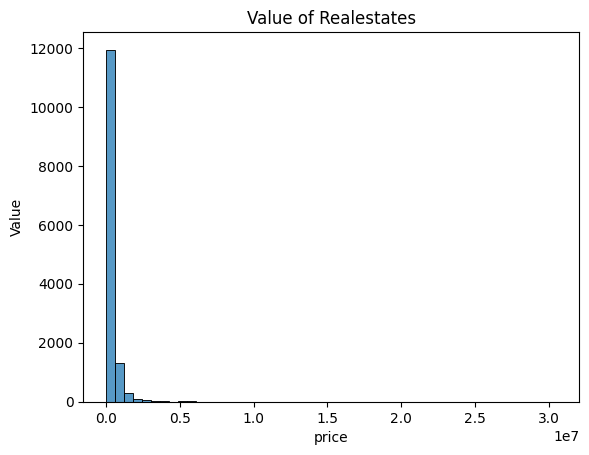

In [ ]:
# sns.figure()
sns.histplot(df["price"], bins=50)
plt.xlabel("price")
plt.ylabel("Value")
plt.title("Value of Realestates")
plt.show()

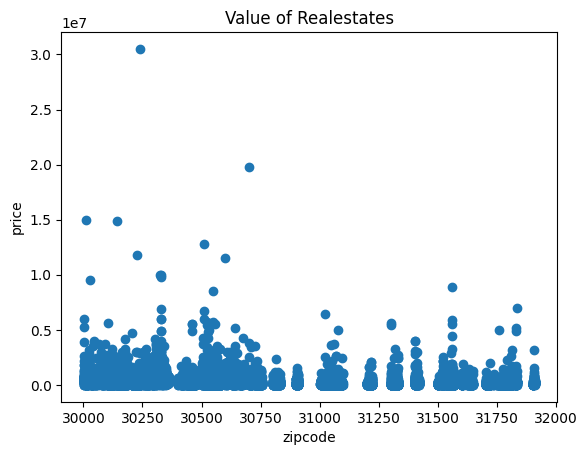

In [ ]:
plt.figure()
plt.scatter(df["zipcode"],df["price"])
plt.xlabel("zipcode")
plt.ylabel("price")
plt.title("Value of Realestates")
plt.show()

In [ ]:
x=df.drop("price",axis=1).values
x

array([[1.6000e+01, 7.4000e+01, 3.1503e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 5.6000e+01, 3.1503e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 6.2000e+01, 3.1503e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.6000e+01, 1.3100e+02, 3.0054e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 1.9300e+02, 3.0054e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 1.4700e+02, 3.0054e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
y=df["price"].values
y

array([169900., 159000.,  45000., ..., 350000., 379000., 337900.])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[1.6000e+01, 0.0000e+00, 3.1082e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 1.8000e+02, 3.0188e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 0.0000e+00, 3.0533e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.6000e+01, 0.0000e+00, 3.1554e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 0.0000e+00, 3.1331e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6000e+01, 0.0000e+00, 3.1794e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
y_train

array([ 15000., 279900.,  65000., ...,  52500.,  34875., 150000.])

scalling

In [ ]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.        , -0.0617398 ,  0.74068554, ..., -0.25616023,
        -0.22049573, -0.06104584],
       [ 0.        ,  0.03041039, -0.86550356, ..., -0.25616023,
        -0.22049573, -0.06104584],
       [ 0.        , -0.0617398 , -0.24566548, ..., -0.25616023,
        -0.22049573, -0.06104584],
       ...,
       [ 0.        , -0.0617398 ,  1.58869589, ..., -0.25616023,
        -0.22049573, -0.06104584],
       [ 0.        , -0.0617398 ,  1.18804693, ..., -0.25616023,
        -0.22049573, -0.06104584],
       [ 0.        , -0.0617398 ,  2.0198876 , ..., -0.25616023,
        -0.22049573, -0.06104584]])

In [ ]:
y_train

array([ 15000., 279900.,  65000., ...,  52500.,  34875., 150000.])

Model Creation

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Prediction

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([116730.30173043, 481182.08184833, 752691.99455753, ...,
       224009.06208377, 238887.11886151, 111016.48799018])

Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

MAE: 215490.3298494175
MSE: 155837165858.71152
RMSE 394762.1636615033
R2 Score: 0.32346397858079334


In [ ]:
comparison_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,239000.0,1.167303e+05
1,483000.0,4.811821e+05
2,350000.0,7.526920e+05
3,2500000.0,1.235878e+06
4,32500.0,1.469877e+05
...,...,...
2756,89900.0,1.620297e+05
2757,7500.0,1.617319e+05
2758,35000.0,2.240091e+05
2759,249500.0,2.388871e+05


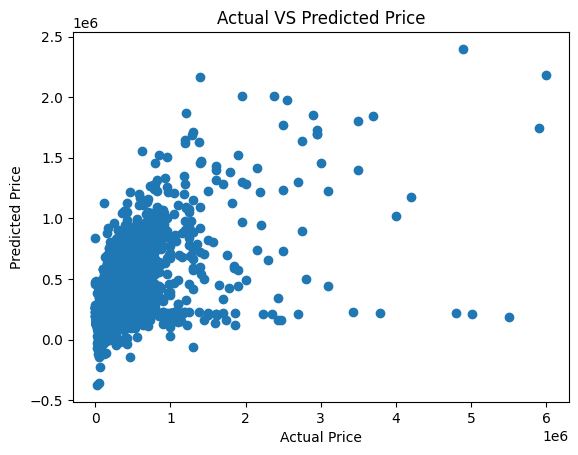

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

In [ ]:
new_house =pd.DataFrame({
"stateId":[16],
"pricePerSquareFoot":[74.0],
"zipcode":[31503.0],
"longitude":[-82.232475],
"latitude":[31.200703],
"livingArea":[2302.0],
"livingAreaValue":[2302.0],
"bathrooms":[3.0],
"bedrooms":[4.0],
"buildingArea":[0],
"parking":[0],
"garageSpaces":[0],
"hasGarage":[0],
"pool":[0],
"spa":[0],
"isNewConstruction":[0],
"hasPetsAllowed":[0]

})

In [ ]:
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price)

Predicted Price: [-4.72983016e+08]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
